## Docker engine 
#### Docker ecosystem
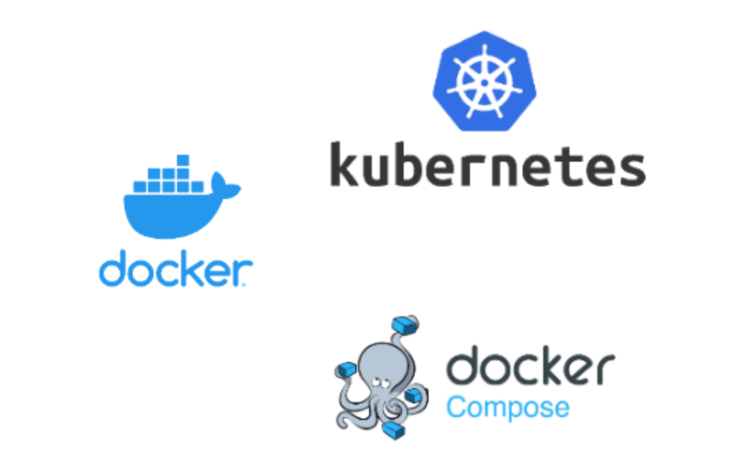
- Docker --> Creates , run , manage containers (We will focus on that)
- Kubernetes --> System for containers scheduling and management
- Docker compose --> Defining and running multiple docker containers

#### Docker engine 
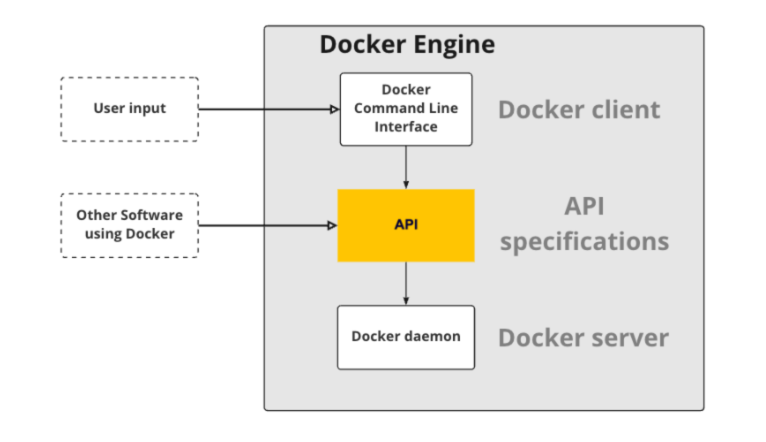
- Client --> Talks to the server 
- Server --> Manages images and containers
- API -->define how you can work with the server



## Understanding Docker Images and Containers

### Docker Images

- **Definition**: Docker images are blueprints for containers. They contain all the necessary components and configurations for an application but don't have them actively running.
- **Contents**: Inside a Docker image, you'll find:
  - Runtime environment (e.g., specific Node.js version)
  - Application code
  - Dependencies
  - Configuration (e.g., environment variables)
  - Additional instructions (e.g., commands)
- **Read-Only**: Docker images are read-only, meaning once created, they cannot be changed. Any modifications require creating a new image.
- **File System**: Images have their own file system independent of the host system.

### Docker Containers

- **Definition**: Docker containers are runnable instances of Docker images. They execute the application based on the specifications outlined in the image.
- **Creation**: When an image is run, it creates a container, which is a process capable of running the application.
- **Isolated Process**: Containers run independently from other processes on the host system, providing isolation and encapsulation.
- **Portable and Consistent**: Since containers encapsulate everything an application needs, they can be easily shared and run consistently across different environments.

### Key Points

- **Image vs. Container**: Image is a blueprint, while a container is a runnable instance based on that blueprint.
- **Portability**: Docker images ensure consistency across different environments, making application deployment more reliable.
- **Isolation**: Containers provide process isolation, ensuring that applications run independently from other processes on the host system.


## Creating your own docker images
### Docker Image
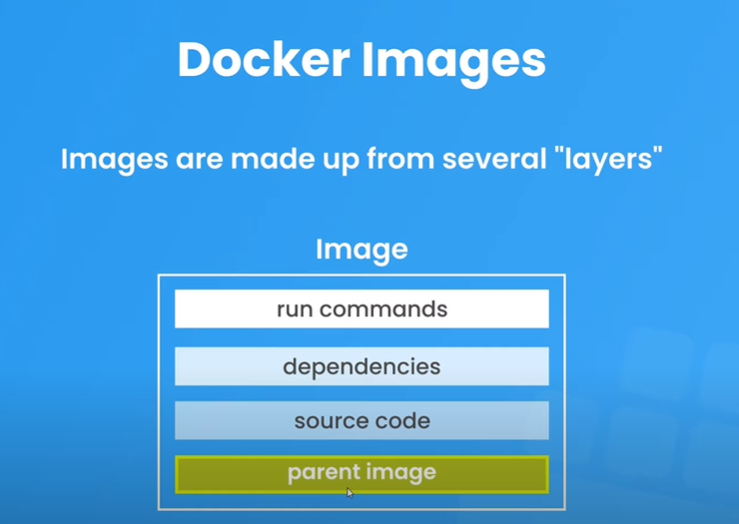

Docker image has multiple layers 
When you create a Docker image, you typically start with a parent image, and then you can customize and add your own layers on top of it.
Parent images can be official images provided by Docker, community-contributed images, or custom images you or your organization have created. These parent images often contain a minimal operating system installation (like Alpine Linux or Ubuntu), along with necessary runtime environments, libraries, and dependencies.

### Selecteing parent image
You choose a suitable parent image that provides the necessary environment for your application. This could be an official image from Docker Hub or a custom image maintained by your organization.

### Creating images with docker files


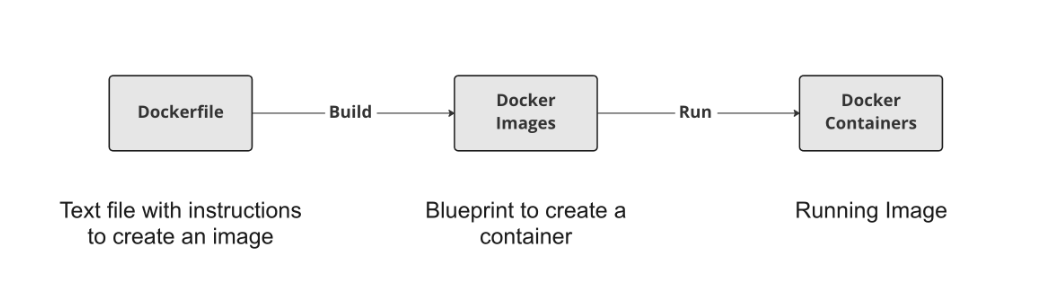

- Dockerfile always starts from another image specified using the FROM instruction
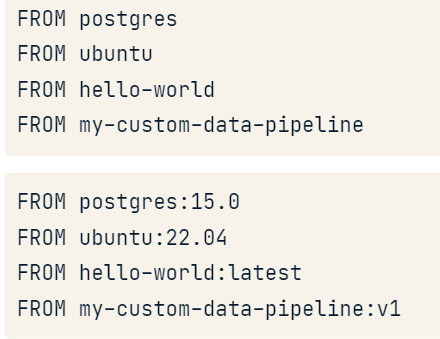

- After creating docker file , you should build it to create an image 


In [ ]:
FROM node:17-alpine     #Parent image (from dockerhub)

WORKDIR /app           #Changing cd 
    
COPY . .               #Copies project files from cd in host to cd (/app) in container

RUN npm install        #Installs dependencies

EXPOSE 4000             #Exposes port 4000 from container 
# required for docker desktop port mapping

CMD ["node", "app.js"]    #Running node app.js in cmd

In [ ]:
- docker build /location/to/Dockerfile
- docker build . #build image in current working directory
- docker built -t first_image . #naming your image
- docker built -t first_image:v0 #naming and giving a version
    

###  `.dockerignore` File
To prevent unnecessary copying of local host files that you dont want inside the  Docker image, you can use a `.dockerignore` file. This file specifies which files or folders Docker should ignore when copying files into the image.

###  `port mapping` 
Port mapping in Docker containers allows you to map ports exposed by a container to ports on your host computer, enabling communication between the host and the containerized application. This is essential for accessing services running inside Docker containers from outside the container environment

```python
docker run -d -p 4000:4000 --name my_app_container_1 my_app  #-p 4000:4000 maps port 4000 on the host to port 4000 in the container.
```

###  `Layer caching`
Layer caching in Docker is a mechanism that optimizes the build process of Docker images by reusing cached layers from previous builds. This significantly reduces build times, especially when only certain parts of the Dockerfile have changed

Example : 
``` python
FROM node:14
WORKDIR /app
COPY package.json .
RUN npm install
COPY . .
EXPOSE 3000
CMD ["node", "app.js"]
```

If I build this image , docker will cache every layer , now when we build it again it looks in the cache and if any layer is changed it will rebuild every layer after it , but layers before it will be loaded from cache

###  `Docker volumes`
Docker volumes allow mapping of folders on the host computer to specific folders inside the container.
Changes made in the mapped folders on the host computer reflect in the corresponding folders inside the container.

```python
docker run --name myapp_c_nodemon -p 4000:4000 -v /absolute/path/to/project:/app    
```

To ignore certain files from being volumed use anonymous : 
```python
-v /app/node_modules     #folder in your container 
```

###  `Docker compose`
Used for defining and running multi-container Docker applications. It uses YAML configuration files to define the services, networks, and volumes required for an application's containers. 

So instead of running docker containers using CMD , we will write our configurations in the docker-compose and we will run that docker compose file
Create `docker-compose.yml` not in the project folder , but in the projects folder

```yaml
version: "3.8"
services:
  api:
    build: ./api
    container_name: api_c
    ports:
      - '4000:4000'
    volumes:
      - ./api:/app
      - ./app/node_mo

Runs the following 

docker run --name api_c -p 4000:4000 -v ./api:/app  -v ./app/node_modules ./apidules
```

In [ ]:
- docker pull <image-name> #pulls an image from dockerhub 
- docker pull <image-name>:<image-version> #pulls an image with its version

- docker images #lists all images that you have 

- docker image rm <image-name> #Removes an image  (there shouldnt be container attached to it)
- docker container prune #Removes all stopped containers
- docker image prune -a #Removes images without associated containers


In [ ]:
- docker run <image-name> #Run container and get output
- docker run -it <image-name> #Run container and get interactive shell , type exit to quit the it
- docker run -d <image-name>  #Run container in the background  giving us back control of the shell.
- docker run --name <container-name> <image-name> #You can add a name for the container

- docker logs <container-id>  #lists the logs of the container
- docker logs -f <container-id>  #Used to get historical and Live logs

- docker ps # list the running containers
- docker ps -f "name=<container-name>" #You can filter on names

- docker stop <container-id> #stop container 
- docker stop <container-name>  #You can stop a container using its name instead of id
- docker start  <container-name> #You can Start stopped container
- docker container rm <container-id> #Used to clean up container resources




In [ ]:
- docker pull dockerhub.myprivateregistry.com/classify_spam:v1 #pulling from private registry
    
- docker tag classify_spam:v1 dockerhub.myprivateregistry.com/classify_spam:v1   #name an image  
- docker image push dockerhub.myprivateregistry.com/classify_spam:v1  #push to a registry 
    
- docker login dockerhub.myprivateregistry.com #some private registries might need authentication

- docker save -o image.tar classify_spam:v1 #saving images as files
- docker load -i image.tar #loading images

## Running Docker Containers
#### The Docker CLI
- Docker command line interface will send instructions to the Docker daemon.
- Every commands starts with docker .
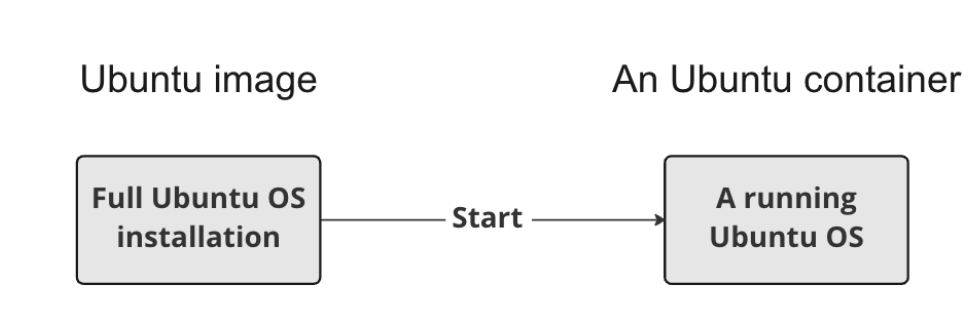

## Managing images
#### Getting premade images
- You can pull premade images from dockerhub 

## Distributing images


### Docker file

1. Within your project directory, create a file named Dockerfile (without any file extension). You can use a text editor of your choice to create and edit this file.

``` docker
# Use the chosen base image
FROM ubuntu:latest

# Set metadata for the image
LABEL maintainer="your_name <your_email@example.com>"

# Install dependencies or perform any necessary setup
RUN apt-get update && apt-get install -y \
    package1 \
    package2 \
    && rm -rf /var/lib/apt/lists/*

# Copy application code or files into the image
COPY . /app

# Set the working directory for subsequent commands
WORKDIR /app

# Specify a default command to run when the container starts
CMD ["./your_application"]



```

### Customizing an image
- You will use the RUN command which allows you to run any valid shell command while building an image 

In [ ]:
#Example : docker file 
- FROM ubuntu  
- RUN apt-get update  #apt-get is a package manager which enables us to install software , here we update it to get last versions of software
- RUN apt-get install -y python3  #

### COPYing files into an image
- The COPY command it typed in the dockerfile

In [ ]:
- COPY <src-path-on-host> <dest-path-on-image> # Not specifying a filename in the src-path will copy all the file contents.

### Downloading files
- Instead of copying files from a local directory, files are often downloaded in the image build

In [ ]:
- RUN curl <file-url> -o <destination> #Download file 
- RUN unzip <dest-folder>/<filename>.zip #Unzip file 
- RUN rm <copy_directory>/<filename>.zip #Remove original zip file

### Downloading files efficiently
- Each instruction that downloads files adds to the total size of the image.
- Even if the files are later deleted.
- The solution is to download, unpack and remove files in a single instruction.

In [ ]:
RUN curl <file_download_url> -o <destination_directory>/<filename>.zip \
&& unzip <destination_directory>/<filename>.zip -d <unzipped-directory> \
&& rm <destination_directory>/<filename>.zip

RUN curl https://assets.datacamp.com/production/repositories/6082/datasets/31a5052c6a5424cbb8d939a7a6eff9311957e7d0/pipeline_final.zip -o /pipeline_final.zip \
&& unzip /pipeline_final.zip  \
&& rm /pipeline_final.zip

### Choosing a start command for your Docker image
- You will use CMD instruction in dockerfile 
    - Runs when the image is started.
    - Does not increase the size of the image .
    - Does not get executed in the build
    - If multiple exist, only the last will have an effect

In [ ]:
- CMD python3 my_pipeline.py
- CMD start.sh

### Overriding the default start command


In [ ]:
- docker run <image> <shell-command> # Override the CMD set in the image
- docker run -it <image> <shell-command> # Override the CMD set in the image and run interactively
#ex docker run -it postgress bash